# Telecom Churn Case Study

In this case sudy we were given to predict the customer which are at a high risk of churn.

Here we need to find high valued customers and need to perform model

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In [1]:
# Importing the basic packages to start with
import pandas as pd # Mainly to import dataset and perform dataframe operations
import numpy as np # package to perform Numerical calculations
from matplotlib import pyplot as plt # package for visualization
import warnings 
import seaborn as sns # package for visualization
%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_column',1000000)
pd.set_option('display.max_rows',1000000)
pd.set_option('display.max_colwidth', 1000000)

In [5]:
# Importing the dataset 
tel_churn=pd.read_csv('telecom_churn_data.csv')

In [6]:
# Having a look at the dataset after importing
tel_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
# Renaming the misspelled columns
tel_churn.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [8]:
# Having a look at the shape of the dataframe
tel_churn.shape

(99999, 226)

In [9]:
# looking at the basic information of the dataframe
tel_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [10]:
# Listing the columns in the dataset
list(tel_churn.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [11]:
# create column name list by types of columns
id_columns = ['mobile_number', 'circle_id']
date_columns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7',
             'date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']
numeric_cols = [column for column in tel_churn.columns if column not in id_columns + date_columns + cat_columns]

#### Missing Values Treatment

In [12]:
# Looking at the "recharge" columns
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]
# looking at the description of the "recharge" columns
tel_churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [13]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
tel_churn.loc[tel_churn.total_rech_data_6.isnull() & tel_churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [14]:
# Creating list to impute values with 0 value
zero_imputation = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [15]:
# Impute missing values with 0
tel_churn[zero_imputation] = tel_churn[zero_imputation].apply(lambda x: x.fillna(0))

In [16]:
# Drop id and date columns
print("Shape before dropping columns: ", tel_churn.shape)
tel_churn = tel_churn.drop(id_columns + date_columns, axis=1)
print("Shape after dropping columns: ", tel_churn.shape)

Shape before dropping columns:  (99999, 226)
Shape after dropping columns:  (99999, 212)


### Replacing NaN values in categorical variables

In [17]:
# Replace missing values with '-1' in categorical columns
tel_churn[cat_columns] = tel_churn[cat_columns].apply(lambda x: x.fillna(-1))

In [18]:
# Missing value ratio
print("Missing value ratio:\n")
print(tel_churn[cat_columns].isnull().sum()*100/tel_churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [19]:
### Drop variables with more than a given threshold of missing values¶

initial_cols = tel_churn.shape[1]

miss_threshold = 0.7

include_cols = list(tel_churn.apply(lambda column: True if column.isnull().sum()/tel_churn.shape[0] < miss_threshold else False))

drop_missing = pd.DataFrame({'features':tel_churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [20]:
# drop columns
tel_churn = tel_churn.loc[:, include_cols]

dropped_cols = tel_churn.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [21]:
# Imputing the remaining missing values with the mean() for 
# Numeric features and for categorical features imputing with mode()

num_cols=list(tel_churn.select_dtypes(exclude='object'))
cat_cols=list(tel_churn.select_dtypes(include=['object']))

for i in tel_churn[num_cols]:
    tel_churn[i].fillna(tel_churn[i].median(),inplace=True)

    for i in tel_churn[cat_cols]:
        tel_churn[i].fillna(tel_churn[i].mode()[0],inplace=True)

In [22]:
# Displaying null values
print(tel_churn.isnull().sum()*100/tel_churn.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [23]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
tel_churn['total_data_rech_6'] = tel_churn['total_rech_data_6'] * tel_churn['av_rech_amt_data_6']
tel_churn['total_data_rech_7'] = tel_churn['total_rech_data_7'] * tel_churn['av_rech_amt_data_7']

In [24]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
tel_churn['amt_data_6'] = tel_churn['total_rech_amt_6'] + tel_churn['total_data_rech_6']
tel_churn['amt_data_7'] = tel_churn['total_rech_amt_7'] + tel_churn['total_data_rech_7']

In [25]:
# calculate average recharge done by customer in June and July
tel_churn['avg_amt_data_6_7'] = (tel_churn['amt_data_6'] + tel_churn['amt_data_7'])/2

In [26]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(tel_churn['avg_amt_data_6_7'].quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [27]:
# Keeping only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
filtered_df = tel_churn.loc[tel_churn['avg_amt_data_6_7'] >= tel_churn['avg_amt_data_6_7'].quantile(0.7), :]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.shape

(30001, 201)

In [28]:
# Delete variables created to filter high-value customers
filtered_df = filtered_df.drop(['total_data_rech_6', 'total_data_rech_7',
                                'amt_data_6', 'amt_data_7', 'avg_amt_data_6_7'], axis=1)
filtered_df.shape

(30001, 196)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

In [29]:
# calculate total incoming and outgoing minutes of usage
filtered_df['total_calls_mou_9'] = filtered_df['total_ic_mou_9'] + filtered_df['total_og_mou_9']

In [30]:
# calculate 2g and 3g data consumption
filtered_df['total_internet_mb_9'] = filtered_df['vol_2g_mb_9'] + filtered_df['vol_3g_mb_9']

In [31]:
# create churn variable: Those who have not used either calls or internet in the 
# month of September are customers who have churned
# 0 - not churn, 1 - churn
filtered_df['churn'] = filtered_df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 
                                                           and row.total_internet_mb_9 == 0) 
                                         else 0, axis=1)

In [32]:
# delete derived variables
filtered_df = filtered_df.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [33]:
# change data type to category
filtered_df['churn'] = filtered_df['churn'].astype("category")

# print churn ratio
print("Churn Ratio:")
print(filtered_df['churn'].value_counts()*100/filtered_df.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [34]:
# Deriving columns detail after substracting the action phase i.e 8th columns with the 6th and 7th columns

filtered_df['arpu_diff'] = filtered_df['arpu_8'] - ((filtered_df.arpu_6 + filtered_df.arpu_7)/2)

filtered_df['onnet_mou_diff'] = filtered_df['onnet_mou_8'] - ((filtered_df.onnet_mou_6 + filtered_df.onnet_mou_7)/2)

filtered_df['offnet_mou_diff'] = filtered_df['offnet_mou_8'] - ((filtered_df.offnet_mou_6 + filtered_df.offnet_mou_7)/2)

filtered_df['roam_ic_mou_diff'] = filtered_df['roam_ic_mou_8'] - ((filtered_df.roam_ic_mou_6 + filtered_df.roam_ic_mou_7)/2)

filtered_df['roam_og_mou_diff'] = filtered_df['roam_og_mou_8'] - ((filtered_df.roam_og_mou_6 + filtered_df.roam_og_mou_7)/2)

filtered_df['loc_og_mou_diff'] = filtered_df['loc_og_mou_8'] - ((filtered_df.loc_og_mou_6 + filtered_df.loc_og_mou_7)/2)

filtered_df['std_og_mou_diff'] = filtered_df['std_og_mou_8'] - ((filtered_df.std_og_mou_6 + filtered_df.std_og_mou_7)/2)

filtered_df['isd_og_mou_diff'] = filtered_df['isd_og_mou_8'] - ((filtered_df.isd_og_mou_6 + filtered_df.isd_og_mou_7)/2)

filtered_df['spl_og_mou_diff'] = filtered_df['spl_og_mou_8'] - ((filtered_df['spl_og_mou_6'] + filtered_df['spl_og_mou_7'])/2)

filtered_df['total_og_mou_diff'] = filtered_df['total_og_mou_8'] - ((filtered_df['total_og_mou_6'] + filtered_df['total_og_mou_7'])/2)

filtered_df['loc_ic_mou_diff'] = filtered_df['loc_ic_mou_8'] - ((filtered_df['loc_ic_mou_6'] + filtered_df['loc_ic_mou_7'])/2)

filtered_df['std_ic_mou_diff'] = filtered_df['std_ic_mou_8'] - ((filtered_df['std_ic_mou_6'] + filtered_df['std_ic_mou_7'])/2)

filtered_df['isd_ic_mou_diff'] = filtered_df['isd_ic_mou_8'] - ((filtered_df['isd_ic_mou_6'] + filtered_df['isd_ic_mou_7'])/2)

filtered_df['spl_ic_mou_diff'] = filtered_df['spl_ic_mou_8'] - ((filtered_df['spl_ic_mou_6'] + filtered_df['spl_ic_mou_7'])/2)

filtered_df['total_ic_mou_diff'] = filtered_df['total_ic_mou_8'] - ((filtered_df['total_ic_mou_6'] + filtered_df['total_ic_mou_7'])/2)

filtered_df['total_rech_num_diff'] = filtered_df['total_rech_num_8'] - ((filtered_df['total_rech_num_6'] + filtered_df['total_rech_num_7'])/2)

filtered_df['total_rech_amt_diff'] = filtered_df['total_rech_amt_8'] - ((filtered_df['total_rech_amt_6'] + filtered_df['total_rech_amt_7'])/2)

filtered_df['max_rech_amt_diff'] = filtered_df['max_rech_amt_8'] - ((filtered_df['max_rech_amt_6'] + filtered_df['max_rech_amt_7'])/2)

filtered_df['total_rech_data_diff'] = filtered_df['total_rech_data_8'] - ((filtered_df['total_rech_data_6'] + filtered_df['total_rech_data_7'])/2)

filtered_df['max_rech_data_diff'] = filtered_df['max_rech_data_8'] - ((filtered_df['max_rech_data_6'] + filtered_df['max_rech_data_7'])/2)

filtered_df['av_rech_amt_data_diff'] = filtered_df['av_rech_amt_data_8'] - ((filtered_df['av_rech_amt_data_6'] + filtered_df['av_rech_amt_data_7'])/2)

filtered_df['vol_2g_mb_diff'] = filtered_df['vol_2g_mb_8'] - ((filtered_df['vol_2g_mb_6'] + filtered_df['vol_2g_mb_7'])/2)

filtered_df['vol_3g_mb_diff'] = filtered_df['vol_3g_mb_8'] - ((filtered_df['vol_3g_mb_6'] + filtered_df['vol_3g_mb_7'])/2)

In [35]:
# let's look at summary of one of the difference variables
filtered_df['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [36]:
# delete all variables relating to 9th month
filtered_df = filtered_df.filter(regex='[^9]$', axis=1)
filtered_df.shape

(30001, 172)

In [37]:
# extract all names that end with 9
col_9_names = filtered_df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in filtered_df.columns if col not in cat_cols]

In [38]:
filtered_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,7.7025,-33.32,-94.0225,0.00,0.000,-64.3975,-11.365,0.000,0.00,0.000,-86.915,-5.925,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,

### Visualising the data

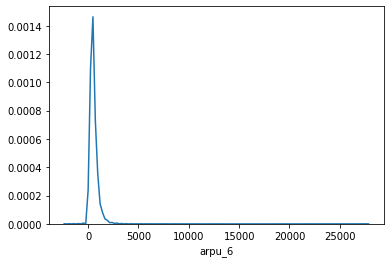

In [39]:
sns.distplot(filtered_df.arpu_6,hist=False)

Variables are very skewed towards the left.

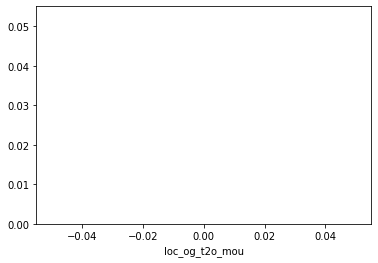

In [40]:
sns.distplot(filtered_df.loc_og_t2o_mou,hist=False)

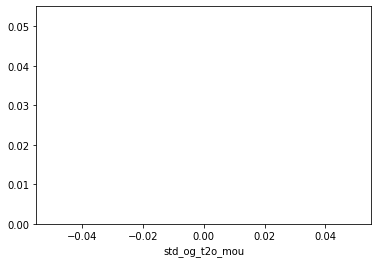

In [41]:
sns.distplot(filtered_df.std_og_t2o_mou,hist=False)

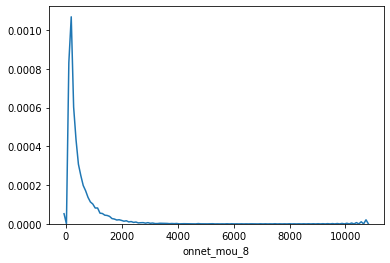

In [42]:
sns.distplot(filtered_df.onnet_mou_8,hist=False)

### Model to predict customer that are going to churn

In [43]:
# import required libraries

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [44]:
# change churn to numeric
filtered_df['churn'] = pd.to_numeric(filtered_df['churn'])

In [45]:
# divide data into train and test
X = filtered_df.drop("churn", axis = 1)
y = filtered_df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4, stratify = y)

In [46]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 171)
(21000,)
(9001, 171)
(9001,)


In [47]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

filtered_pca = pca.fit_transform(X_train)
filtered_pca

array([[ 2.26637407e+00,  3.37155287e+00, -2.22219149e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-4.17928136e+00, -6.16552239e-01, -1.62591094e-01, ...,
         8.15233518e-16,  8.43783951e-16,  1.26698316e-16],
       [-5.46774722e+00, -2.13489661e+00,  1.00628550e+00, ...,
         1.78235479e-15,  6.84856525e-15, -3.80942153e-16],
       ...,
       [ 3.22451580e-01, -3.40292250e+00, -2.76824357e+00, ...,
         6.79622700e-18, -9.44389154e-18,  7.96193890e-19],
       [ 4.71241794e+00,  2.56695645e+00, -3.63929699e+00, ...,
         1.66226788e-17,  6.23079496e-17, -6.06484250e-18],
       [ 3.00620575e-01,  4.15110044e+00, -2.70200823e+00, ...,
        -6.45968097e-18, -8.67154037e-18,  5.79148690e-18]])

In [48]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.95
1       17.79
2       23.34
3       27.96
4       31.88
5       35.53
6       38.51
7       41.08
8       43.54
9       45.76
10      47.86
11      49.89
12      51.82
13      53.61
14      55.36
15      57.08
16      58.74
17      60.24
18      61.69
19      63.01
20      64.27
21      65.47
22      66.66
23      67.84
24      68.99
25      70.08
26      71.13
27      72.17
28      73.17
29      74.17
30      75.11
31      76.03
32      76.93
33      77.81
34      78.64
35      79.45
36      80.24
37      81.00
38      81.74
39      82.47
40      83.18
41      83.88
42      84.56
43      85.15
44      85.71
45      86.25
46      86.76
47      87.27
48      87.77
49      88.26
50      88.72
51      89.18
52      89.62
53      90.04
54      90.44
55      90.84
56      91.20
57      91.56
58      91.90
59      92.23
60      92.54
61      92.85
62      93.13
63      93.41
64      93.69
65      93.95
66      94.21
67      94.46
68      94.70
69      94.92
70      95.14
71    

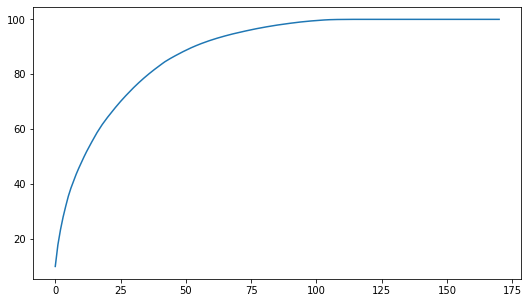

In [49]:
# plot feature variance
features = range(pca.n_components_)
cum_var = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cum_var)

~ 60 components explain 90% variance

~ 80 components explain 95% variance

## PCA and Logistic Regression

In [50]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))]

pipeline = Pipeline(steps)

In [51]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8077619047619048

In [52]:
## Evaluate on test data
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n ",cm)

Confusion Matrix : 
  [[6605 1664]
 [ 122  610]]


In [53]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 0.83
Specificity: 0.8
AUC: 0.89


Hyperparameter tuning - PCA and Logistic Regression

In [54]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918619
1    0.081381
Name: churn, dtype: float64

In [55]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - 
# it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
logistic_pca = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 
          'logistic__penalty': ['l1', 'l2']
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic_pca, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [56]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           c...
                          

In [57]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.229231,10.613079,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 60}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,5.061495,0.324680,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 80}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,10.382639,0.695158,0.451507,0.198665,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 60}",0.894823,0.886474,0.871099,0.872317,0.877215,0.880386,0.009021,9
3,9.051578,3.154960,0.301005,0.220795,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}",0.896357,0.886714,0.874986,0.869627,0.878509,0.881239,0.009380,1
4,7.553125,3.685043,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 60}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23


In [58]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8812385726955363
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [59]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n ",cm)


Confusion Matrix: 
  [[6962 1307]
 [ 139  593]]


In [60]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 0.81
Specificity: 0.84
AUC: 0.89


#### Random Forest

In [61]:
# random forest - the class weight is used to handle class imbalance - 
# it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [62]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

In [63]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9252984190543639
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [64]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix : \n",cm)

confusion Matrix : 
 [[8139  130]
 [ 365  367]]


In [65]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 0.5
Specificity: 0.98
AUC: 0.93


##### Poor sensitivity. The best model is PCA along with Logistic regression

## Model to choose best features

In [66]:
# run a random forest model on train data
# number of variables to consider to split each node
main_features = int(round(np.sqrt(X_train.shape[1])))    
print(main_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=main_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [67]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=13, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [68]:
# OOB score
rf_model.oob_score_

0.9428095238095238

In [69]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Consfusion Matrix: \n",cm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Consfusion Matrix: 
 [[8156  113]
 [ 396  336]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [70]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Sensitivity: 0.46
Specificity: 0.99
ROC: 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [71]:
# predictors
features = filtered_df.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance.head()

Sum of importance= 100.00000000000003


,variables,importance_percentage
0,total_ic_mou_8,6.385426
1,total_og_mou_8,4.686429
2,arpu_8,4.259989
3,total_rech_amt_diff,3.608059
4,loc_ic_t2m_mou_8,2.685321


In [72]:
### Extracting top 30 features
top_features = feature_importance.variables[0:30]

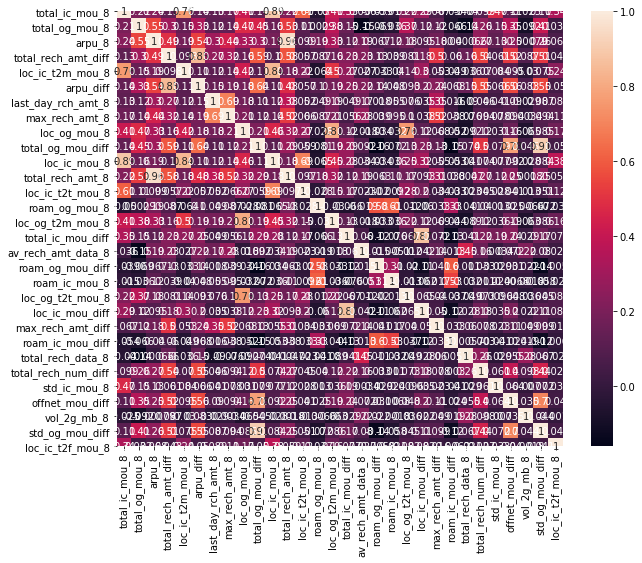

In [73]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,8)
sns.heatmap(data=X_train[top_features].corr(),annot=True)
plt.show()

In [74]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [75]:
X_train.columns      

Index(['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8',
       'std_og_mou_8'],
      dtype='object')

In [76]:
X_test.columns

Index(['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8',
       'std_og_mou_8'],
      dtype='object')

In [77]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [78]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
      

In [79]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8745393180816864
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [80]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cm)


Confusion Matrix :
 [[6878 1391]
 [ 144  588]]


In [81]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 0.8
Specificity: 0.83
ROC: 0.88


#### Top features affecting the customers to churn
- total_ic_mou_8
- total_rech_amt_diff
- total_og_mou_8
- arpu_8
- roam_ic_mou_8
- roam_og_mou_8
- std_ic_mou_8
- avg_rech_amt_data_8
- std_og_mou_8

#### Business Insights

- The telecom company must focus on the roaming rates. They could provide good offers to customer using roaming services. Moreover it is also possible that the roaming network of the telecom company might be weak in some areas due to which customers might be churning.

- Company must also focus on STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.